In [3]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks  as cf
#import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected = True)
cf.go_offline()
import plotly.graph_objects as go
%matplotlib inline

In [4]:
data = pd.read_csv("/Users/rahmonolusegunadeniji/Documents/Project/risk_factors_cervical_cancer.csv")

In [5]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [6]:
data_cv = data.copy()

In [7]:
data_cv.shape

(858, 36)

In [8]:
data_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

# Dealing With Categorical and Numerical Features

In [9]:
data_cv.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

Number of sexual partners

In [10]:
data_cv[data_cv == "?"].count()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [11]:
numerical_features = [
                                  'Number of sexual partners', 
                                  'First sexual intercourse',
                                  'Num of pregnancies', 
                                  'Smokes (years)', 
                                  'Smokes (packs/year)',
                                  'Hormonal Contraceptives (years)',
                                  'IUD (years)',
                                  'STDs (number)'
                    ]

In [12]:
categorical_features =[
 'Smokes',
 'Hormonal Contraceptives',
 'IUD',
 'STDs',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy'
 ]

In [13]:
#replace all "?" with np.Nan
data_cv.replace("?", np.NaN, inplace=True)

In [14]:
#changing the data type of the feature from object to float as well replace the missing values with the median 

for feature in numerical_features:
    print(feature, "", data_cv[feature].median())
    data_cv[feature] =  data_cv[feature].astype(str).astype(float)
    data_cv[feature]= data_cv[feature].fillna(data_cv[feature].median())

Number of sexual partners  2.0
First sexual intercourse  17.0
Num of pregnancies  2.0
Smokes (years)  0.0
Smokes (packs/year)  0.0
Hormonal Contraceptives (years)  0.5
IUD (years)  0.0
STDs (number)  0.0


In [15]:
data_cv.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                 13
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               108
Hormonal Contraceptives (years)         0
IUD                                   117
IUD (years)                             0
STDs                                  105
STDs (number)                           0
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [16]:
categorical_features[:16]

['Smokes',
 'Hormonal Contraceptives',
 'IUD',
 'STDs',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV']

In [17]:
#changing the data type of the feature from object to float as well replace the missing values with the mode

for feature in categorical_features[:16]:
    print(feature, "", data_cv[feature].mode()[0])
    data_cv[feature]= data_cv[feature].astype(str).astype(float)
    data_cv[feature]= data_cv[feature].fillna(data_cv[feature].mode()[0])
    

Smokes  0.0
Hormonal Contraceptives  1.0
IUD  0.0
STDs  0.0
STDs:condylomatosis  0.0
STDs:cervical condylomatosis  0.0
STDs:vaginal condylomatosis  0.0
STDs:vulvo-perineal condylomatosis  0.0
STDs:syphilis  0.0
STDs:pelvic inflammatory disease  0.0
STDs:genital herpes  0.0
STDs:molluscum contagiosum  0.0
STDs:AIDS  0.0
STDs:HIV  0.0
STDs:Hepatitis B  0.0
STDs:HPV  0.0


In [18]:
data_cv.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                  

In [19]:
data_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [20]:
#dropping the columns STDs: Time since first diagnosis and STDs: Time since last diagnosis because of the high number of missing values
data_cv.drop(columns=["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"], axis = 1, inplace = True)

In [21]:
#cheking the shape after dropping the two columns
data_cv.shape

(858, 34)

In [22]:
data_cv.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [23]:
data_cv["Age"].unique().max()

84

In [24]:
def age_categories(Age):
    if Age < 20:
        return "Teenagers"
    elif Age < 30:
        return "Youth"
    elif Age < 40:
        return "Young Adults"
    elif Age < 50:
        return "Adults"
    elif Age < 60:
        return "Middle Aged"
    elif Age < 70:
        return "Middle Aged plus"
    elif Age < 80:
        return "Aged"
    return "Aged Plus"


In [25]:
#adding additional column for age categories
data_cv["Age_category"] = data_cv["Age"].apply(age_categories)

In [26]:
data_cv.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Age_category
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Teenagers
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Teenagers
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Young Adults
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,Middle Aged
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Adults


In [27]:
std_types = [
    
'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
]

In [28]:
#adding additional column for summing up std types categories
data_cv["aggregate_std_types"] = data_cv[std_types].sum(axis=1)

In [29]:
data_cv.head(35)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Age_category,aggregate_std_types
0,18,4.0,15.0,1.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Teenagers,0.0
1,15,1.0,14.0,1.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Teenagers,0.0
2,34,1.0,17.0,1.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Young Adults,0.0
3,52,5.0,16.0,4.0,1.0,37.000000,37.000000,1.0,3.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,Middle Aged,0.0
4,46,3.0,21.0,4.0,0.0,0.000000,0.000000,1.0,15.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Adults,0.0
5,42,3.0,23.0,2.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Adults,0.0
6,51,3.0,17.0,6.0,1.0,34.000000,3.400000,0.0,0.00,1.0,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,1,Middle Aged,0.0
7,26,1.0,26.0,3.0,0.0,0.000000,0.000000,1.0,2.00,1.0,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Youth,0.0
8,45,1.0,20.0,5.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1,0,0,0,0,Adults,0.0
9,44,3.0,15.0,2.0,1.0,1.266973,2.800000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Adults,0.0


# Visualizations & EDA

In [30]:
data_corr = data_cv[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy', 'aggregate_std_types']]

In [33]:
correlation_matrix = data_corr.drop(columns=["aggregate_std_types"], axis=1).corr()
correlation_matrix.fillna(0, inplace=True)

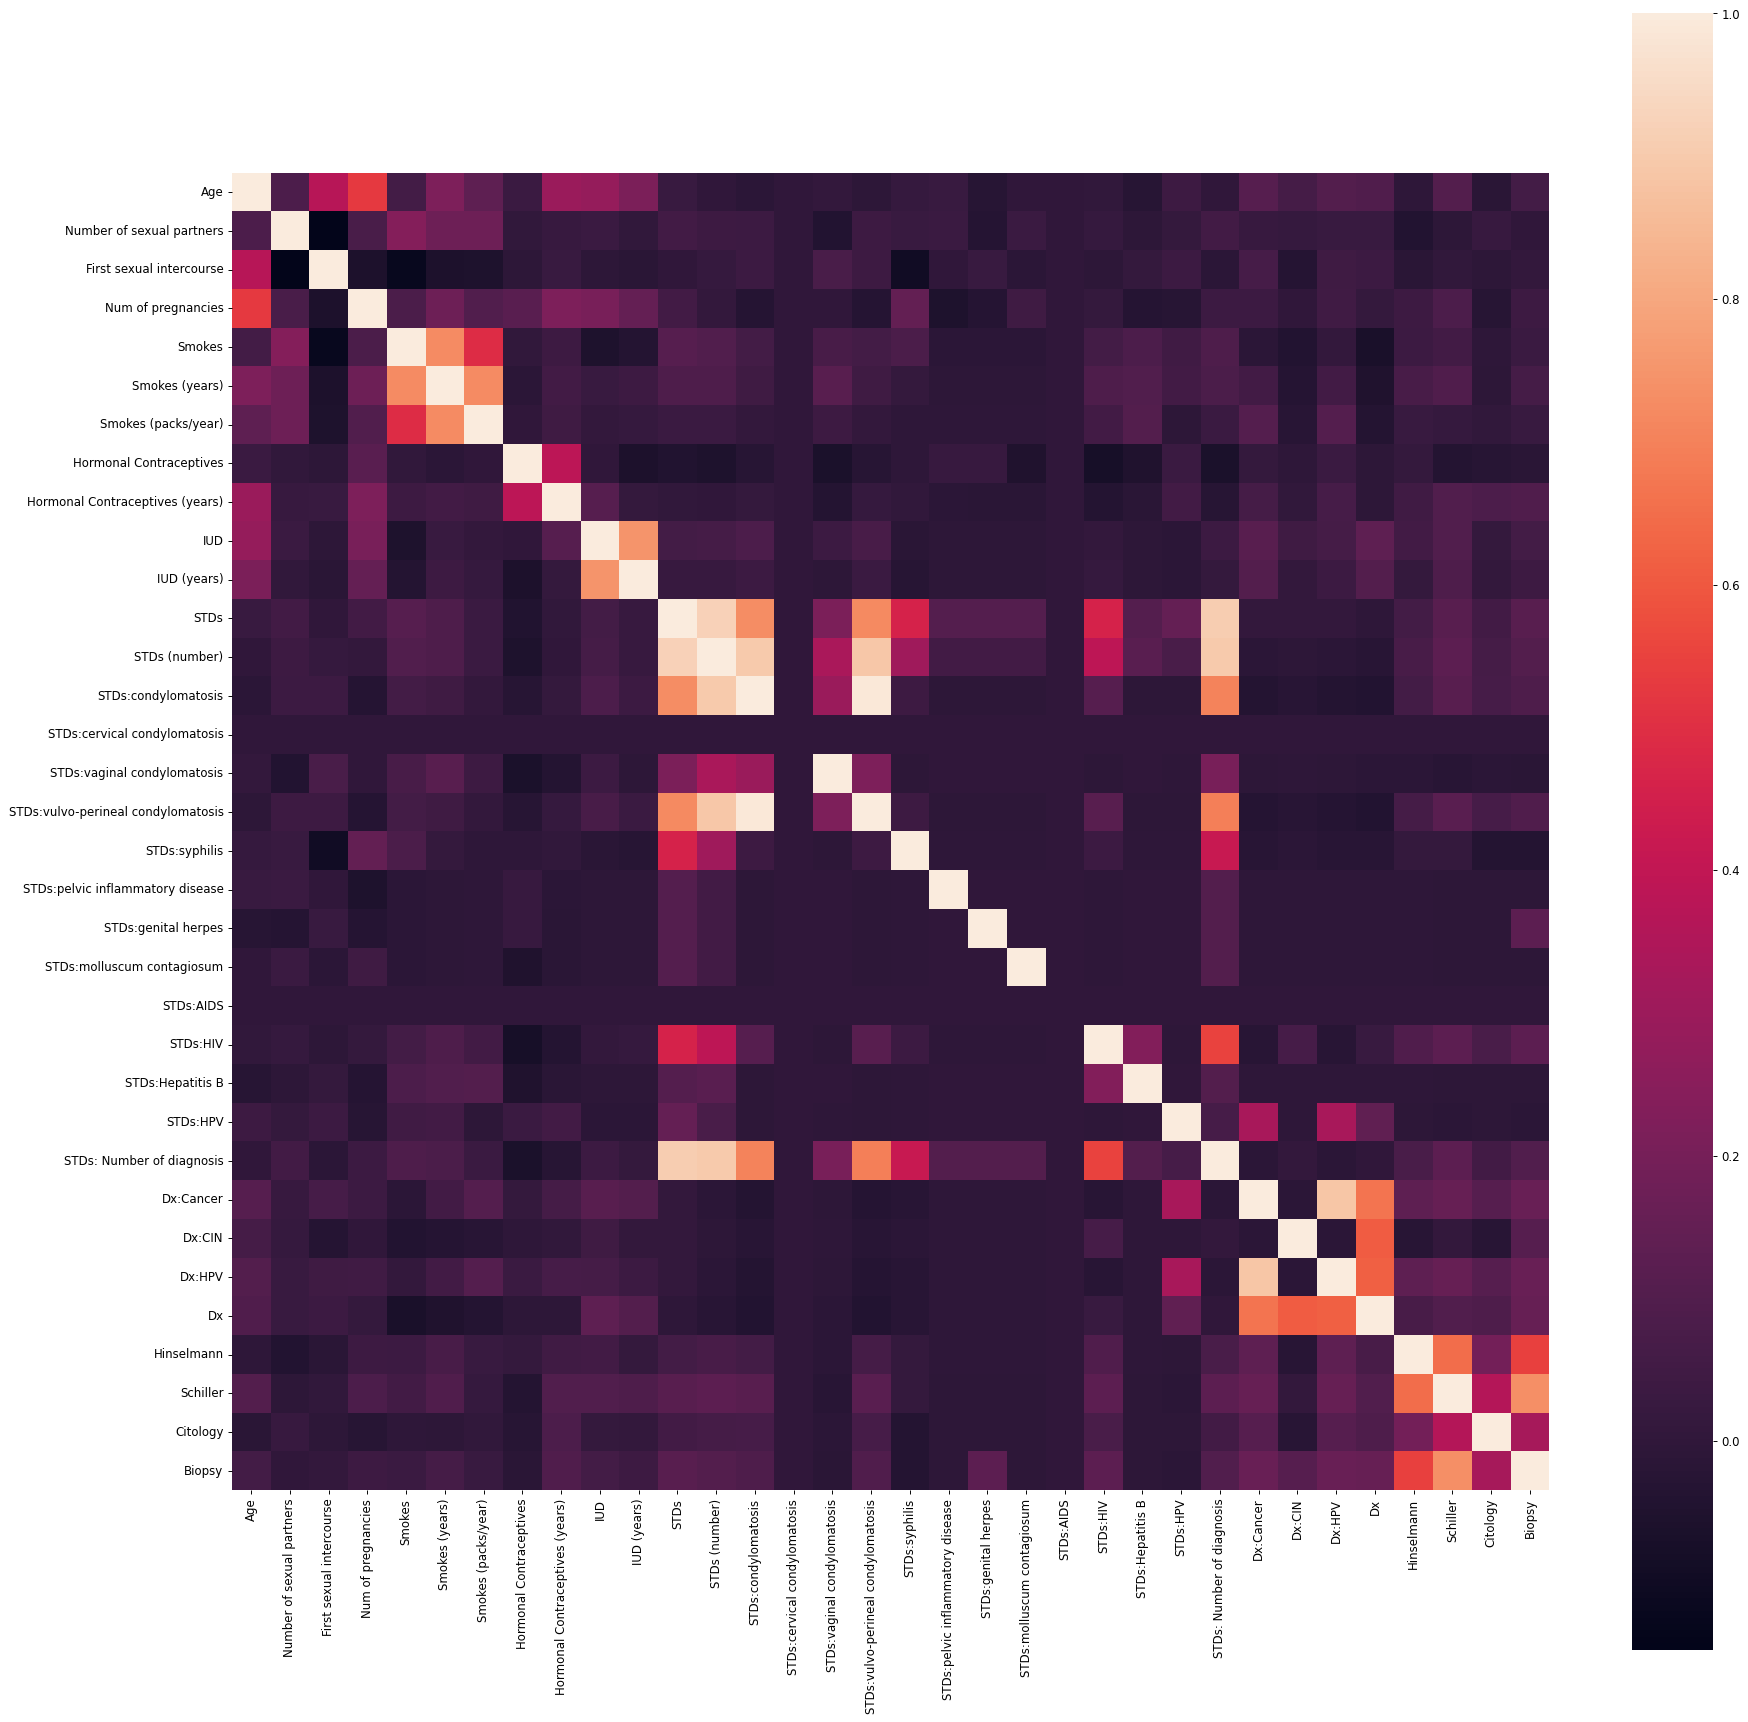

In [52]:
plt.figure(figsize=(25,25), dpi = 85)
sns.heatmap(correlation_matrix, square=True)
plt.show()


In [38]:
import plotly.figure_factory as ff

In [39]:
#Age distribution
group_labels = [group for group in data_cv["Age_category"].unique()]
hist_data = data_cv["Age"]

fig = px.histogram(data_cv, x = hist_data, color="Age_category", marginal="box", width=600, height=600)

fig

In [40]:
group_labels = [group for group in data_cv["Age_category"].unique()]
hist_data = data_cv["Age"]
fig = px.histogram(data_cv, x = hist_data, y = data_cv["Num of pregnancies"], color="Age_category", marginal="box", opacity = 0.85, width=600, height=600)

fig

In [41]:
group_labels = [group for group in data_cv["Age_category"].unique()]
hist_data = data_cv["Number of sexual partners"]
fig = px.histogram(data_cv, x = hist_data, y = data_cv["Num of pregnancies"], color="Age_category", marginal="box", width=800, height=600)

fig

In [42]:
group_labels = [group for group in data_cv["Age_category"].unique()]
hist_data = data_cv["Number of sexual partners"]
fig = px.histogram(data_cv, x = hist_data, y = data_cv["aggregate_std_types"], color="Age_category", marginal="box", opacity = 0.85, width=600, height=600)

fig

In [43]:
import plotly.figure_factory as ff
import scipy

In [44]:
scipy.stats

<module 'scipy.stats' from '/Users/rahmonolusegunadeniji/Documents/Project/venv/lib/python3.11/site-packages/scipy/stats/__init__.py'>

In [45]:
fig = px.box(data_cv, 
             x = "Age_category", 
             y = "Number of sexual partners", 
             color_discrete_sequence=["darkblue"],
             points = "outliers",
             category_orders=['Teenagers', 
                              'Youth',
                              'Young Adults', 
                              'Adults', 
                              'Middle Aged',  
                              'Aged', 
                              'Aged Plus'
                            ],
              width=600,
              height=600
             )
fig

In [46]:
fig = px.box(data_cv, 
             x = "Age_category", 
             y = "Num of pregnancies", 
             color_discrete_sequence=["darkblue"],
             points = "outliers",
             category_orders=['Teenagers', 
                              'Youth',
                              'Young Adults', 
                              'Adults', 
                              'Middle Aged',  
                              'Aged', 
                              'Aged Plus'
                            ],
              width=600,
              height=600
             )
fig

In [47]:
#adding an additional column for aggregating the tests carried out by the patients
aggregrate_tests_col = ["Hinselmann",	"Schiller",	"Citology",	"Biopsy"]

data_cv["aggregate_tests"] = data_cv[aggregrate_tests_col].sum(axis = 1)

In [48]:
data_cv.head(2)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Age_category,aggregate_std_types,aggregate_tests
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Teenagers,0.0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Teenagers,0.0,0


In [49]:
fig = px.histogram(
    data_cv.query("aggregate_tests > 0").sort_values(by= "aggregate_tests", ascending=True),
    x = "Age_category",
    facet_col = "aggregate_tests",
    facet_row = "Dx:Cancer",
    color_discrete_sequence = ["blueviolet"],
    opacity= 0.9,
    width = 900,
    height = 600
)

fig

In [50]:
fig = px.histogram(
    data_cv.query("aggregate_tests > 0").sort_values(by= "aggregate_tests", ascending=True),
    x = "Age_category",
    facet_col = "aggregate_tests",
    facet_row = "Dx:HPV",
    color_discrete_sequence = ["palevioletred"],
    opacity= 0.9,
    width = 900,
    height = 600
)

fig

In [51]:
pie_df = data_cv.query(" `Dx:Cancer` == 1")

In [52]:
fig = px.pie(pie_df, 
             values= "Age", 
             names = "Age_category", 
             title = "Women With Cancer Diagnoses with Respect To Their Ages",
             color_discrete_sequence = px.colors.sequential.Agsunset,
             opacity= .9,
             width = 550,
             height = 500)

fig

In [53]:
pie_df2 = data_cv.query(" `Dx:HPV` == 1")

In [54]:
fig = px.pie(pie_df2, 
             values= "Age", 
             names = "Age_category", 
             title = "Women With HPV Diagnoses with Respect To Their Ages",
             color_discrete_sequence = px.colors.sequential.Agsunset,
             opacity= .9,
             width = 550,
             height = 500)

fig

In [55]:
pie_df3 = data_cv.query("aggregate_std_types > 0 & `Dx:Cancer` == 1")

In [56]:
fig = px.pie(pie_df3, 
             values= "aggregate_std_types", 
             names = "Age_category", 
             title = "Women With At Least one STD and Cancer Diagnoses with Respect To Their Ages",
             color_discrete_sequence = px.colors.sequential.Agsunset,
             opacity= .9,
             width = 800,
             height = 500)

fig

In [63]:
contraceptive_df = data_cv.query("`Hormonal Contraceptives` == 1 & IUD == 1")

In [76]:
fig = px.histogram(
    data_cv.query("`Hormonal Contraceptives` == 1 or IUD == 1").sort_values(by="Age_category", ascending=False),
    x = "Age_category",
    y = ["Hormonal Contraceptives", "IUD"],
    barmode = "group",
    width = 800,
    height= 600
)

fig

In [87]:
fig = px.histogram(
    data_cv.query("`Hormonal Contraceptives` == 1 & IUD == 1").sort_values(by="Age_category", ascending=False),
    x = "Age_category",
    y = ["Hormonal Contraceptives" , "IUD"],
    color = "Dx:Cancer",
    barmode= "group",
    width = 800,
    height= 600
)

fig

In [58]:
model_df = data_cv.to_csv("/Users/rahmonolusegunadeniji/Documents/Project/project_notebooks/cleaned_data_set.csv")